In [4]:
import parselmouth as pm
import os
import numpy as np
import matplotlib.pyplot as plt

Praat is a software package written in C and C++ that implements many speech analysis algorithms in an easy-to-use interface. We're going to be using the parselmouth package, a Python wrapper for Praat functions. Documentation is sparse for the library, but exploring the [documentation](https://parselmouth.readthedocs.io/en/stable/installation.html) might be helpful to find new functions. 

In [5]:
import os
import collections
hr = {}
for filename in os.listdir('/Users/varun/Desktop/BeaverWorks/Week2Public/voice/'):
    Harris = pm.Sound('/Users/varun/Desktop/BeaverWorks/Week2Public/voice/'+filename)
    hr[filename[11:]] = Harris.to_pitch().t_grid().var()

hr = collections.OrderedDict(sorted(hr.items()))
print(hr)
# for i in hr:
#     print(hr[i])

OrderedDict([('Alex.wav', 388.62700000000007), ('Anna.wav', 277.537), ('Carol.wav', 320.23), ('David.wav', 612.1836666666667), ('Edward.wav', 364.8724000000001), ('Elaine.wav', 265.5502), ('Esteban.wav', 366.63906666666674), ('Govind.wav', 287.33652500000005), ('Harris.wav', 273.70300000000003), ('JoyLim.wav', 324.272025), ('JoyLiu.wav', 332.74799999999993), ('Mariela.wav', 327.29406666666665), ('Odessa.wav', 422.57200000000006), ('Pratik.wav', 328.96739999999994), ('Sharvil.wav', 351.9750000000001), ('Shreya.wav', 275.7125250000001), ('Shuen.wav', 238.78840000000002), ('Suat.wav', 283.824125), ('Upamanyu.wav', 311.10082500000004), ('Varun.wav', 315.7002), ('Vineet.wav', 390.33612500000004), ('Vishal.wav', 397.900825), ('Yeriel.wav', 375.64829166666675)])


We've imported Harris's voice as a parselmouth.Sound object. This is parselmouth's version of his voice, and has a huge number of features that can be found on the [documentation](https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.Sound). The only problem with the documentation is that it doesn't exist. This library is abysmally documented. But that's ok, I can show you how to get what you need from it. 

In [13]:
hInt = Harris.to_intensity()
hPit = Harris.to_pitch()
hForm = Harris.to_formant_burg()

In [39]:
hPit.t_grid()

315.7002

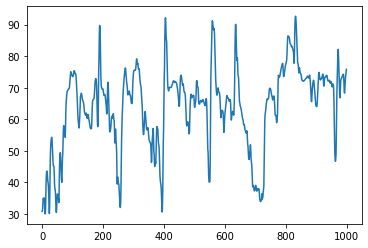

In [27]:
intensities = []
for val in hInt.t_grid():
    intensities.append(hInt.get_value(val))
plt.plot(intensities[:1000])

The .t_grid() attribute shows a list of timesteps within the sound file. By iterating over this list of times, we can pull every value from the Sound object and add it to a new list, like we're doing below. This can be done for any of the features. 

In [28]:
formants = [[],[],[]]
for val in hForm.t_grid():
    formants[0].append(hForm.get_value_at_time(1,val))
    formants[1].append(hForm.get_value_at_time(2,val))
    formants[2].append(hForm.get_value_at_time(3,val))

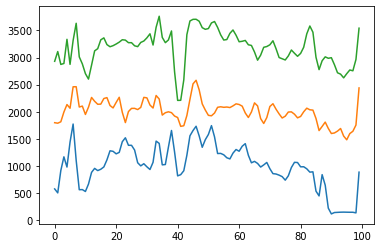

In [29]:
plt.plot(formants[0][0:100])
plt.plot(formants[1][0:100])
plt.plot(formants[2][0:100])